In [11]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import seaborn as sns
import pickle
import sys
from surface_properties.analysis import Surface
print("Package imported successfully!")


Package imported successfully!


In [4]:
test = mda.Universe('../../../../mlx_v2/6.6_2.gro', '../../../../mlx_v2/old_trajs/rep1_skip10.xtc')

# Interdigitation, overlap, densities

In [12]:
def run_interdigitation_analysis(universe, lipids, neutral_lipid, solvent, filename='strong_resid_list', nbins=100, b=0, e=None):
    analysis = Surface.InterdigitationAnalysis(universe, lipids, neutral_lipid, solvent, strong_resid_list_name=filename)
    return analysis.interdigit(nbins=nbins, b=b, e=e)



In [17]:
results = run_interdigitation_analysis(test, ['POPC', 'DOPE', 'SAPI'], 'TRIO', 'SWM4', filename='strong_residues', b=0, e=100)

Processing frames: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.55frame/s]

units: Z (nm), interdigitation (nm), time (ns), density (g/m3)


In [19]:
with open('results_mlx.pkl', 'wb') as f:
    pickle.dump(results, f)
with open('results_mlx.pkl', 'rb') as f:
    results = pickle.load(f)

In [20]:
def plot_interdigitation_over_time(results):
    # Extract data for plotting
    total_interdigitation = results['inter']['total']
    strong_interdigitation = results['inter']['strong']
    weak_interdigitation = results['inter']['weak']

    # Extract time and interdigitation values
    time_total, inter_total = total_interdigitation[:, 0], total_interdigitation[:, 1]
    time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
    time_weak, inter_weak = weak_interdigitation[:, 0], weak_interdigitation[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(time_total, inter_total, label='Total Intedigitation', color='blue')
    plt.plot(time_strong, inter_strong, label='Strong Intedigitation', color='green')
    plt.plot(time_weak, inter_weak, label='Weak Intedigitation', color='red')

    plt.title('Interdigitation Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Interdigitation (nm)')
    plt.ylim(0, 2.9)
#     plt.legend()
    plt.grid(True)
    plt.show()
def plot_overlap(results):
    # Extract data for plotting
    total_overlap = results['ov']['total']
    strong_overlap = results['ov']['strong']
    weak_overlap = results['ov']['weak']

    # Extract z-coordinates and overlap values
    z_coords, ov_total = total_overlap[:, 0], total_overlap[:, 1]
    _, ov_strong = strong_overlap[:, 0], strong_overlap[:, 1]
    _, ov_weak = weak_overlap[:, 0], weak_overlap[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(z_coords, ov_total, label='Total Overlap', color='blue', linewidth=2)
    plt.plot(z_coords, ov_strong, label='Strong Overlap', color='green', linewidth=2)
    plt.plot(z_coords, ov_weak, label='Weak Overlap', color='red', linewidth=2)

    plt.title('Overlap as a Function of Z-coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Overlap (dimensionless)')
    plt.ylim(0, 1)
#     plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'results' is your data dictionary loaded as per your simulation outputs


def plot_densities(results):
    # Extract density data
    pl_density = results['density']['PL']
    trio_density = results['density']['TRIO']
    surf_trio_density = results['density']['SURF-TRIO']
    core_trio_density = results['density']['CORE-TRIO']
    water_density = results['density']['water']

    # Extract z-coordinates and density values
    z_coords, den_pl = pl_density[:, 0], pl_density[:, 1]
    _, den_trio = trio_density[:, 0], trio_density[:, 1]
    _, den_surf_trio = surf_trio_density[:, 0], surf_trio_density[:, 1]
    _, den_core_trio = core_trio_density[:, 0], core_trio_density[:, 1]
    _, den_water = water_density[:, 0], water_density[:, 1]

    # Create the plot
    plt.figure(figsize=(5, 2))
    plt.plot(z_coords, den_pl, label='PL Density', color='blue', linewidth=2)
    plt.plot(z_coords, den_trio, label='TRIO Density', color='green', linewidth=2)
    plt.plot(z_coords, den_surf_trio, label='SURF-TRIO Density', color='red', linewidth=2)
    plt.plot(z_coords, den_core_trio, label='CORE-TRIO Density', color='purple', linewidth=2)
    plt.plot(z_coords, den_water, label='Water Density', color='cyan', linewidth=2)

    plt.title('Density Profiles Along Z-Coordinate')
    plt.xlabel('Z-coordinate (nm)')
    plt.ylabel('Density (g/m³)')
#     plt.legend()
    plt.grid(True)
    plt.show()

def plot_ratios(results):
    # Extract data for plotting
    num_ratio = results['ratio']['num']          # Number of strong interdigitating molecules over time
    trio_to_pl_ratio = results['ratio']['trio-to-pl']  # Ratio of strong interdigitating molecules to phospholipids
    trio_to_pl_trio_ratio = results['ratio']['trio-to-pl+trio']  # Ratio of strong interdigitating molecules to the sum of phospholipids and strong interdigitating molecules

    # Extract time and ratio values
    time_num, ratio_num = num_ratio[:, 0], num_ratio[:, 1]
    time_trio_to_pl, ratio_trio_to_pl = trio_to_pl_ratio[:, 0], trio_to_pl_ratio[:, 1]
    time_trio_to_pl_trio, ratio_trio_to_pl_trio = trio_to_pl_trio_ratio[:, 0], trio_to_pl_trio_ratio[:, 1]

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.subplot(311)  # 3 rows, 1 column, 1st subplot
    plt.plot(time_num, ratio_num, label='Number of Strong Interdigitators', color='blue', linewidth=2)
    plt.title('Number of Strong Interdigitating Molecules Over Time')
    plt.xlabel('Time (ns)')
    plt.ylabel('Number')
    plt.ylim(0,30)
#     plt.legend()
    plt.grid(True)



    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()




In [21]:
def plot_interdigitation_over_time_all(results_list, titles, ncols=3):

    nrows = (len(results_list) + ncols - 1) // ncols  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 3))
    axes = axes.flatten() 
    lines = []  
    labels = [] 
    
    for i, (results, title) in enumerate(zip(results_list, titles)):
        total_interdigitation = results['inter']['total']
        strong_interdigitation = results['inter']['strong']
        weak_interdigitation = results['inter']['weak']

        # Extract time and interdigitation values
        time_total, inter_total = total_interdigitation[:, 0], total_interdigitation[:, 1]
        time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
        time_weak, inter_weak = weak_interdigitation[:, 0], weak_interdigitation[:, 1]
        
        if 'drude' in title.lower():
            time_total *= 100
            time_strong *= 100
            time_weak *= 100

        # Plot on respective axes
        line1, = axes[i].plot(time_total, inter_total, label='Total Intedigitation', color='blue')
        line2, = axes[i].plot(time_strong, inter_strong, label='Strong Intedigitation', color='green')
        line3, = axes[i].plot(time_weak, inter_weak, label='Weak Intedigitation', color='red')

        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Time (ns)')
        axes[i].set_ylabel('Interdigitation (nm)')
        axes[i].set_ylim(0, 2.9)
        axes[i].set_xlim(1, None)
        axes[i].grid(True)
        if i == 0:  
            lines.extend([line1, line2, line3])
            labels.extend([line.get_label() for line in [line1, line2, line3]])
    fig.legend(lines, labels, bbox_to_anchor=(0.6, 0.0), fontsize='large')
    for j in range(len(results_list), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
#     plt.savefig('interdigit_relevent.png',dpi=400,bbox_inches='tight')
    plt.show()


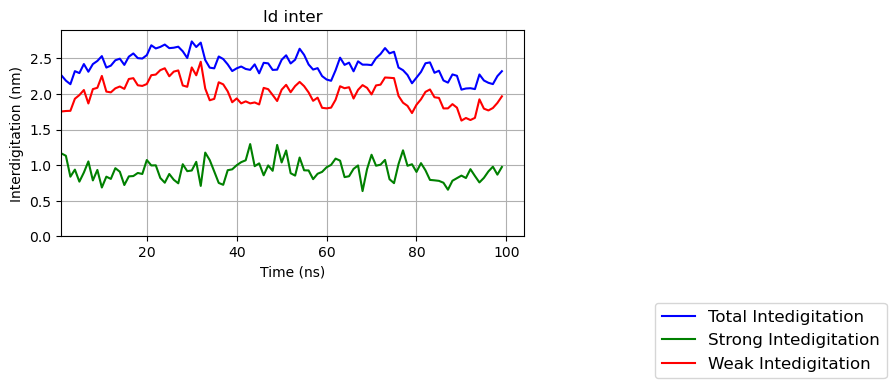

In [22]:
results_list = [results]
titles = ['ld inter']
plot_interdigitation_over_time_all(results_list, titles)


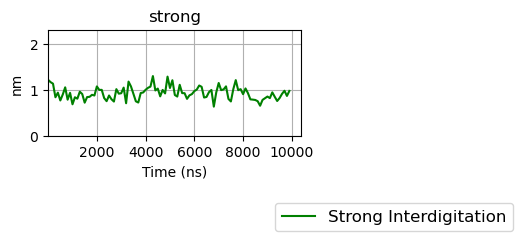

In [24]:
def plot_interdigitation_over_time_strong(results_list, titles, ncols=3):
    nrows = (len(results_list) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3, nrows *2)) 
    axes = axes.flatten()
    lines = []
    labels = []
    for i, (results, title) in enumerate(zip(results_list, titles)):
        strong_interdigitation = results['inter']['strong']
        time_strong, inter_strong = strong_interdigitation[:, 0], strong_interdigitation[:, 1]
        if 'drude' in title.lower():
            time_strong *= 100
        line2, = axes[i].plot(time_strong, inter_strong, label='Strong Interdigitation', color='green')
        axes[i].set_title(titles[i])
        axes[i].set_xlabel('Time (ns)')
        axes[i].set_ylabel('nm')
        axes[i].set_ylim(0, 2.3)
        axes[i].set_xlim(1, None)
        axes[i].grid(True)
        if i == 0:
            lines.append(line2)
            labels.append(line2.get_label())
    fig.legend(lines, labels, bbox_to_anchor=(0.6, 0.0), fontsize='large')
    for j in range(len(results_list), len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
#     plt.savefig('strong_inter_all.png',dpi=600,bbox_inches='tight')
    plt.show()

results_list = [results]
titles = ['strong']
plot_interdigitation_over_time_strong(results_list, titles)


# Number SURF-TG 

In [25]:
def preprocess_data(results_list, titles):
    processed_results = []
    for results, title in zip(results_list, titles):
        if 'drude' in title.lower():
            results_copy = results.copy()
            results_copy['inter']['strong'][:, 0] *= 100
            processed_results.append(results_copy)
        else:
            processed_results.append(results)
    return processed_results

In [26]:
processed_results_list = preprocess_data(results_list, titles)

In [15]:
results_list

[{'inter': {'total': array([[ 5.00000016,  2.17463879],
          [ 5.10000017,  2.22542826],
          [ 5.20000017,  2.2218211 ],
          [ 5.30000017,  2.221096  ],
          [ 5.40000018,  2.21833813],
          [ 5.50000018,  2.21908723],
          [ 5.60000018,  2.22485788],
          [ 5.70000019,  2.24495565],
          [ 5.80000019,  2.23474404],
          [ 5.90000019,  2.2070296 ],
          [ 6.0000002 ,  2.19567158],
          [ 6.1000002 ,  2.23823841],
          [ 6.2000002 ,  2.23950065],
          [ 6.30000021,  2.28115493],
          [ 6.40000021,  2.24361484],
          [ 6.50000021,  2.29626925],
          [ 6.60000022,  2.33341386],
          [ 6.70000022,  2.31710904],
          [ 6.80000022,  2.32801302],
          [ 6.90000023,  2.29552034],
          [ 7.00000023,  2.28057875],
          [ 7.10000023,  2.273446  ],
          [ 7.20000024,  2.29758119],
          [ 7.30000024,  2.29704042],
          [ 7.40000024,  2.31181945],
          [ 7.50000025,  2.31450

In [16]:
# Loop through each entry in results_list and access strong_residues
for index, result in enumerate(results_list):
    # Access the 'strong_residues' list within the current dictionary
    strong_residues = result.get('strong_residues', [])
    
    # Print each set of strong residues for each entry
    print(f"Entry {index + 1}:")
    for frame_index, residues in enumerate(strong_residues):
        print(f"  Frame {frame_index + 1}: {residues}")


Entry 1:
